In [1]:
# library
import xgboost as xgb
import pandas as pd
import time
from sklearn.metrics import mean_squared_error
import numpy as np
import logging
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
logging.basicConfig(format='%(asctime)s: %(levelname)s: %(message)s', level=logging.INFO)

In [2]:
# import the csv data
import_file_name = 'bestbuy_data_xgboost.csv'
data_df = pd.read_csv(import_file_name)
data_df.head(5)

,Encoded_SKU_ID,SALES_DATE,SALES_MONTH,SALES_DAY,SALES_WEEKDAY,SALES_HOLIDAY,SUBCLASS_NAME_CAT,CLASS_NAME_CAT,ML_NAME_CAT,CATEGORY_NAME_CAT,INVENTORY_CAT,GSPI,DAILY_UNITS
0,1,2017-05-28,5,28,6,0,43,7,1,0,1,0.095363,0
1,2,2017-05-28,5,28,6,0,7,7,1,0,3,0.095363,0
2,5,2017-05-28,5,28,6,0,61,18,0,1,1,0.095363,0
3,6,2017-05-28,5,28,6,0,107,18,0,1,1,0.095363,0
4,7,2017-05-28,5,28,6,0,61,18,0,1,3,0.095363,0


In [3]:
# split the last 7 days for test set
train_df = data_df[(data_df['SALES_DATE'] < '2022-07-25')]
train_df = train_df.drop(['SALES_DATE'], axis=1)
test_df = data_df[(data_df['SALES_DATE'] >= '2022-07-25')]
test_df = test_df.drop(['SALES_DATE'], axis=1)
print('Number of Rows: ' + str(len(data_df)))
print('Number of Rows: ' + str(len(train_df)))
print(train_df.columns)
print('Number of Rows: ' + str(len(test_df)))
print(test_df.columns)

Number of Rows: 846632
Number of Rows: 842722
Index(['Encoded_SKU_ID', 'SALES_MONTH', 'SALES_DAY', 'SALES_WEEKDAY',
       'SALES_HOLIDAY', 'SUBCLASS_NAME_CAT', 'CLASS_NAME_CAT', 'ML_NAME_CAT',
       'CATEGORY_NAME_CAT', 'INVENTORY_CAT', 'GSPI', 'DAILY_UNITS'],
      dtype='object')
Number of Rows: 3910
Index(['Encoded_SKU_ID', 'SALES_MONTH', 'SALES_DAY', 'SALES_WEEKDAY',
       'SALES_HOLIDAY', 'SUBCLASS_NAME_CAT', 'CLASS_NAME_CAT', 'ML_NAME_CAT',
       'CATEGORY_NAME_CAT', 'INVENTORY_CAT', 'GSPI', 'DAILY_UNITS'],
      dtype='object')


In [4]:
# prepare for X_train, y_train, X_test, y_test
X_train = train_df.loc[:, train_df.columns != 'DAILY_UNITS']
y_train = train_df[['DAILY_UNITS']]
X_test = test_df.loc[:, test_df.columns != 'DAILY_UNITS']
y_test = test_df[['DAILY_UNITS']]
print('Number of Rows: ' + str(len(X_train)))
print(X_train.columns)
print('Number of Rows: ' + str(len(y_train)))
print('Number of Rows: ' + str(len(X_test)))
print(X_train.columns)
print('Number of Rows: ' + str(len(y_test)))

Number of Rows: 842722
Index(['Encoded_SKU_ID', 'SALES_MONTH', 'SALES_DAY', 'SALES_WEEKDAY',
       'SALES_HOLIDAY', 'SUBCLASS_NAME_CAT', 'CLASS_NAME_CAT', 'ML_NAME_CAT',
       'CATEGORY_NAME_CAT', 'INVENTORY_CAT', 'GSPI'],
      dtype='object')
Number of Rows: 842722
Number of Rows: 3910
Index(['Encoded_SKU_ID', 'SALES_MONTH', 'SALES_DAY', 'SALES_WEEKDAY',
       'SALES_HOLIDAY', 'SUBCLASS_NAME_CAT', 'CLASS_NAME_CAT', 'ML_NAME_CAT',
       'CATEGORY_NAME_CAT', 'INVENTORY_CAT', 'GSPI'],
      dtype='object')
Number of Rows: 3910


In [5]:
# export the X_train & y_train
X_train.to_csv('bestbuy_xgb_Xtrain.csv', index=False)
y_train.to_csv('bestbuy_xgb_ytrain.csv', index=False)

# xgboost model

In [6]:
# XGBost model
# matrix_train = xgb.DMatrix(X_train, label = y_train)
# matrix_test = xgb.DMatrix(X_test, label = y_test)

In [7]:
# run XGBoost
reg_mod = xgb.XGBRegressor(
    n_estimators=3000,
    learning_rate=0.08,
    subsample=0.75,
    colsample_bytree=1, 
    max_depth=7,
    gamma=0
)

logging.info("start training XGBoost regressor model")
start_time = time.time() # get the start time

reg_mod.fit(X_train, y_train)

logging.info("end training XGBoost regressor model")
end_time = time.time() # get the start time

# get the execution time
elapsed_time_xgb = end_time - start_time
print('Execution time:', elapsed_time_xgb, 'seconds')

2023-01-16 13:01:16,535: INFO: start training XGBoost regressor model
2023-01-16 13:17:39,141: INFO: end training XGBoost regressor model


Execution time: 982.6072118282318 seconds


In [8]:
# prediction
preds = reg_mod.predict(X_test)
rmse_xgb = mean_squared_error(y_test, preds, squared=False)
print("RMSE: %f" % (rmse_xgb))

RMSE: 11.546423


In [9]:
r2_xgb = r2_score(y_test, preds)
print("R_Squared Score : %f" % (r2_xgb))

R_Squared Score : 0.700232


## GridSearhCV

In [10]:
# params_grid = {'max_depth': [3, 6, 10],
#               'learning_rate': [0.01, 0.05, 0.1],
#               'n_estimators': [500, 1000, 2000],
#               'colsample_bytree': [0.3, 0.7]}

# xgb_reg = xgb.XGBRegressor(seed = 20)

# clf = GridSearchCV(estimator = xgb_reg,
#                   param_grid = params_grid,
#                   scoring = 'neg_mean_squared_error',
#                   verbose = 1)
# logging.info("start hyperparameter tuning for XGBoost regressor model")
# start_time = time.time() # get the start time

# clf.fit(X_train, y_train)

# logging.info("end hyperparameter tuning for XGBoost regressor model")
# end_time = time.time() # get the start time

# # get the execution time
# elapsed_time = end_time - start_time
# print('Execution time:', elapsed_time, 'seconds')
# print("Best parameters:", clf.best_params_)

## XGBoost Regressor Model with hyperparameter tuning

In [20]:
# run XGBoost
xgb_reg_tune = xgb.XGBRegressor(
    n_estimators=500,
    learning_rate=0.1,
    subsample=0.6,
    colsample_bytree=0.79, 
    max_depth=3,
    gamma=0.3,
    min_child_weight=5,
    eval_metric='rmse',
    colsample_bylevel=0.7
)

logging.info("start training XGBoost regressor model")
start_time = time.time() # get the start time

xgb_reg_tune.fit(X_train, y_train)

logging.info("end training XGBoost regressor model")
end_time = time.time() # get the start time

# get the execution time
elapsed_time = end_time - start_time
print('Execution time:', elapsed_time, 'seconds')

2023-01-16 12:13:31,026: INFO: start training XGBoost regressor model
2023-01-16 12:14:12,108: INFO: end training XGBoost regressor model


Execution time: 41.083491802215576 seconds


In [21]:
# prediction
preds_tune = xgb_reg_tune.predict(X_test)
rmse_xgb_tune = mean_squared_error(y_test, preds_tune, squared=False)
print("RMSE: %f" % (rmse_xgb_tune))

RMSE: 45.141207


In [22]:
r2_xgb_tune = r2_score(y_test, preds_tune)
print("R_Squared Score : %f" % (r2_xgb_tune))

R_Squared Score : -3.581813


# Randome Forest Regressor Model

In [23]:
from sklearn.ensemble import RandomForestRegressor

rfr_model = RandomForestRegressor(bootstrap=True, max_depth=60, max_features="auto", 
                                  min_samples_leaf=2, min_samples_split=5, n_estimators=24, random_state=64)

# rfr_model = RandomForestRegressor(bootstrap=True, max_depth=42, max_features="sqrt", 
#                                   min_samples_leaf=2, min_samples_split=10, n_estimators=60, random_state=64)

logging.info("start training Random Forest Regressor model")
start_time = time.time() # get the start time

rfr_model.fit(X_train, y_train)

logging.info("end training XGBoost regressor model")
end_time = time.time() # get the start time

# get the execution time
elapsed_time_rfr = end_time - start_time
print('Execution time:', elapsed_time_rfr, 'seconds')

2023-01-16 13:33:14,403: INFO: start training Random Forest Regressor model
/Users/yuchingchen/miniconda3/envs/cse6242_py37/lib/python3.7/site-packages/ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if sys.path[0] == '':
2023-01-16 13:34:09,893: INFO: end training XGBoost regressor model


Execution time: 55.49066376686096 seconds


In [24]:
# prediction for RF model with numerical columns
preds_rfr = rfr_model.predict(X_test)
for i, v in enumerate(preds_rfr):
    preds_rfr[i] = int(v.round())

# Evaluation of the RF model with numerical columns
rmse_rfr = round(metrics.mean_squared_error(y_test, preds_rfr, squared=False) , 2)
r2_rfr = metrics.r2_score(y_test, preds_rfr)
print("For the RF model with numerical columns, evaluation metrics are as follow -------")
print("Root Mean Squared Error:", rmse_rfr)
print("R-Squared: %.2f" % r2_rfr)

For the RF model with numerical columns, evaluation metrics are as follow -------
Root Mean Squared Error: 10.01
R-Squared: 0.77


[('Encoded_SKU_ID', 0.27), ('CLASS_NAME_CAT', 0.17), ('SALES_DAY', 0.15), ('GSPI', 0.11), ('SALES_MONTH', 0.1), ('SUBCLASS_NAME_CAT', 0.09), ('INVENTORY_CAT', 0.05), ('SALES_WEEKDAY', 0.04), ('SALES_HOLIDAY', 0.01), ('CATEGORY_NAME_CAT', 0.01), ('ML_NAME_CAT', 0.0)]


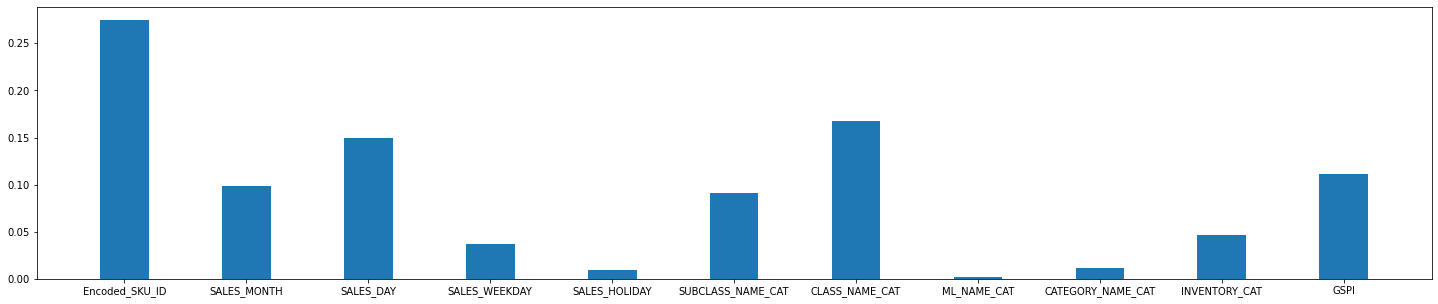

In [25]:
# perform the feature importance for the RF model with numerical columns
importances = list(rfr_model.feature_importances_)

feature_names = list(X_train.columns)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_names, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse=True)
print(feature_importances)

# plot feature importances
fig = plt.figure(figsize = (25, 5))
plt.bar(feature_names, importances, width=0.4)
plt.savefig('RF_importance.png')

# Baseline model

In [26]:
# Baeline Model: using the mean value of y as prediction
avg_unit = y_train.mean()
average = [avg_unit] * len(y_test)
rmse_base = round(metrics.mean_squared_error(y_test, average, squared=False), 2)
r2_base = metrics.r2_score(y_test, average)

print("For the baseline model, evaluation metrics are as follow -------")
print("Root Mean Squared Error:", rmse_base)
print("R-Squared: %.8f" % r2_base)

For the baseline model, evaluation metrics are as follow -------
Root Mean Squared Error: 22.19
R-Squared: -0.10712973


## Compare the result

In [27]:
# unfinish
df2 = pd.DataFrame({"Model": ['Baseline', 'XGBoost', 'RandomForest Regression'], "Root Mean Square Error":[rmse_base, rmse_xgb, rmse_rfr], "R2 Score":[round(r2_base, 6), round(r2_xgb, 2), round(r2_rfr, 2)], "Executed Time (seconds)":['-', round(elapsed_time_xgb, 2), round(elapsed_time_rfr, 2)]})
df2.head()

,Model,Root Mean Square Error,R2 Score,Executed Time (seconds)
0,Baseline,22.190000,-0.10713,-
1,XGBoost,11.546423,0.70000,982.61
2,RandomForest Regression,10.010000,0.77000,55.49
